## Box–Muller transform

https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform

In [39]:
import numpy as np
import pandas as pd 
from scipy.stats import norm, multivariate_normal
import seaborn as sns 

import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_format='retina'

from utils.viz import viz 
viz.get_style()

### Introduction 

Sampling is one of the most important constructs when making probabilistic inferences. Sampling from a gaussian distribution is the essential step for all sampling. 

The Box-Muller transform is one technique that draws a sample from an arbitrary Gaussian distribution. The method is much faster than the standard inverse CDF method and the reject sampling, being accepted as the "standard" sampling algorithm for Gaussian distribution. 

The key euqations of BM method are: 

$$X =  \cos(2\pi u)\sqrt{-2\ln v}$$
$$Y =  \sin(2\pi u)\sqrt{-2\ln v}$$

### Sample from univariate Gaussian distribution 

In [130]:
def randn_bm(mu=0, sig=1, size=1):
    u = np.random.rand(size)
    v = np.random.rand(size)
    z = np.cos(2*np.pi*u)*np.sqrt(-2*np.log(v))
    return mu+z*sig

<AxesSubplot:xlabel='value', ylabel='Count'>

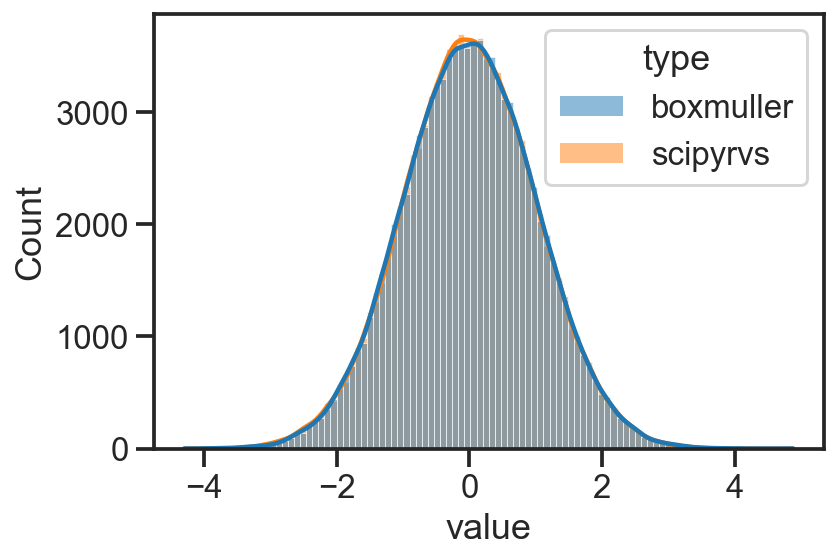

In [131]:
mu, sig, size = 0, 1, 100_000
for_plot = { 
    'value': np.hstack([randn_bm(0, 1, size=size), norm(0, 1).rvs(size)]),
    'type': ['boxmuller']*size + ['scipyrvs']*size
}
for_plot = pd.DataFrame.from_dict(for_plot)

sns.histplot(data=for_plot, x='value', bins=100, kde=True, hue="type")

###  Multivariate Gaussian Sampling

Now we have the box-muller algorithm; the next question is how to extend the method to sample from a multivariate gaussian distribution, for example $X \sim N(\mu, \Sigma)$

* Step 1, let $z \sim N(0, I)$, and decompose the covariance matrix $\Sigma = LL^{\top}$ through a Cholesky decomposition of $\Sigma$
* Step 2, get the samples $x = Lz * \mu$ 

In [135]:
def multivariate_Gauss_Sampling(mu, cov, size=1):
    # decompose the covariance matrix 
    d = len(mu)
    # get z
    z = randn_bm(mu=0, sig=1, size=d*size).reshape(d,size)
    # get l
    l = np.linalg.cholesky(np.array(cov))
    # get x 
    return l@z + np.reshape(mu, [d, 1])

In [144]:
mu, cov = [.5, -.2], [[2.0001, 1.], [1., 2.0001]]
size = 5000
samples = multivariate_Gauss_Sampling(mu, cov, size)
bm_data = pd.DataFrame.from_dict({'x': samples[0, :], 'y':samples[1,:]})
samples = multivariate_normal.rvs(mean=mu, cov=cov, size=size).T
scipy_data = pd.DataFrame.from_dict({'x': samples[0, :], 'y':samples[1,:]})

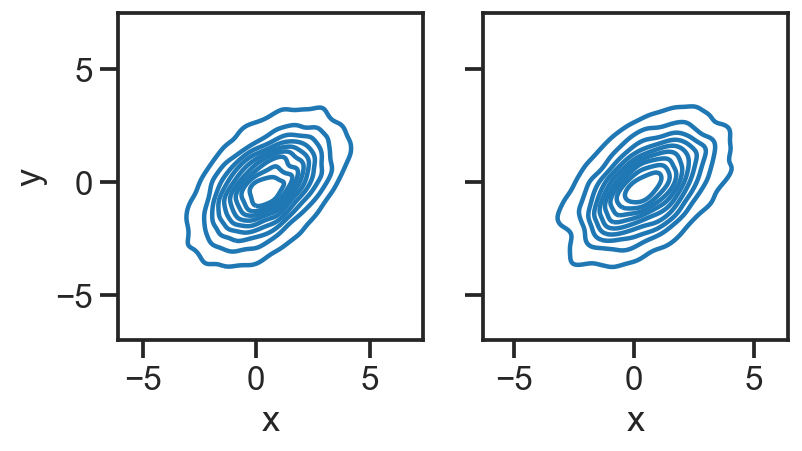

In [145]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(6, 3))
sns.kdeplot(data=bm_data, x='x', y='y', ax=axs[0])
axs[0].set_title('BM sampling')
sns.kdeplot(data=scipy_data, x='x', y='y', ax=axs[1])
axs[1].set_title('scipy sampling')
plt.show()